# Analysis of Trajectory objects

There are several tools you can use to analyze `Trajectory` objects. To illustrate the capabilities of **yupi**, let us consider a list of `Trajectory` objects generated with a `Langevin Generator` (See [Example 1](https://github.com/yupidevs/yupi_examples/blob/master/example_001.py) for a more detailed explanation of the parameters).

In [1]:
from yupi.generators import LangevinGenerator

T = 500      # Total time (number of time steps if dt==1)
dim = 2      # Dimension of the walker trajectories
N = 500      # Number of random walkers
dt = 0.5     # Time step

tau = 2      # Relaxation time
sigma = 0.1  # Scale of the noise pdf

lg = LangevinGenerator(T, dim, N, dt, tau, sigma, seed=0)
trajs = lg.generate()

## Spatial projection

The most basic analysis tool is the plot of the trajectories in the space. If you have a list of `Trajectory` objects, like the ones you get from a generator, you can plot them with:

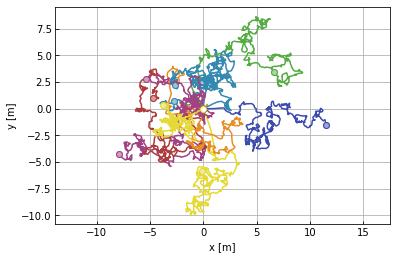

In [2]:
from yupi.graphics import plot_2D
plot_2D(trajs[:10], legend=False)

Notice that we limited to 10 the number of trajectories to plot for the sake of observability, but we will be using the full list of trajectories (`traj`) all over this tutorial.

## Histogram of Velocity

The analysis of the distribution of velocities among all the samples of an ensemble of trajectories is also possible using:

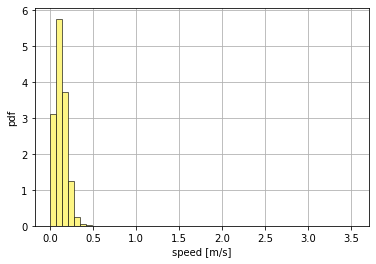

In [3]:
from yupi.stats import speed_ensemble
from yupi.graphics import plot_velocity_hist

v = speed_ensemble(trajs, step=1)
plot_velocity_hist(v, bins=50)

## Histogram of Turning Angles

The analysis of the distribution of turning angles allows to understand how likely is the moving object to turn to specific directions during its motion. It can be observe with yupi by using:

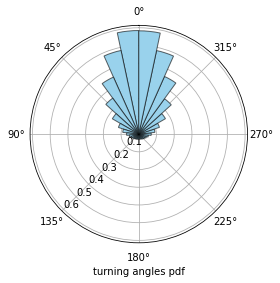

In [4]:
from yupi.stats import turning_angles_ensemble
from yupi.graphics import plot_angles_hist

theta = turning_angles_ensemble(trajs)
plot_angles_hist(theta, bins=30)

## Mean Squared Displacement

The Mean Square Displacement (MSD) is a typical indicator to classify processes away from normal diffusion. The MSD of a normal diffusive trajectory arises as a linear function of time. To estimate the MSD of a list of `Trajectory` objects, you can use:

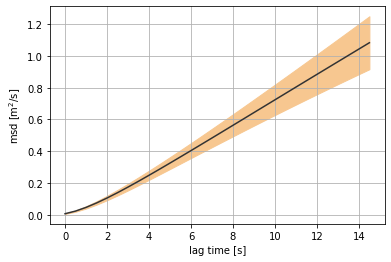

In [5]:
from yupi.stats import msd
from yupi.graphics import plot_msd

msd_mean, msd_std = msd(trajs, time_avg=True, lag=30)
plot_msd(msd_mean, msd_std, dt, lag=30)

## Kurtosis

Another useful quantity is the kurtosis, a measure of the disparity of spatial scales of a dispersal process and also an intuitive means to understand normality. It can be estimated using:

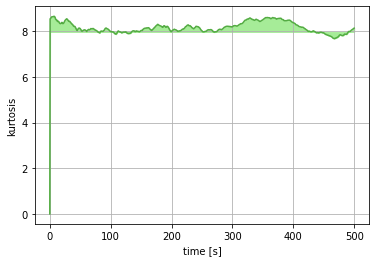

In [6]:
from yupi.stats import kurtosis, kurtosis_reference
from yupi.graphics import plot_kurtosis

kurt_ref = kurtosis_reference(trajs)
kurt_mean, _ = kurtosis(trajs, time_avg=False, lag=30)
plot_kurtosis(kurt_mean, kurtosis_ref=kurt_ref, dt=dt)

## Velocity Autocorrelation Function

The Velocity Autocorrelation Function (VACF) gives valuable information about the influence of correlations during a whole trajectory. To compute it and plot the results, you can use:

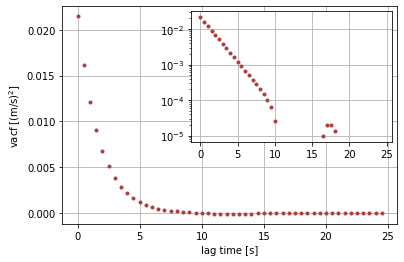

In [7]:
from yupi.stats import vacf
from yupi.graphics import plot_vacf

vacf_mean, _ = vacf(trajs, time_avg=True, lag=50)
plot_vacf(vacf_mean, dt, 50)

## Power Spectral Density

The Power Spectral Density, or Power Spectrum, indicates the frequency content of the trajectory. The inspection of the PSD from a collection of trajectories enables the characterization of the motion in terms of the frequency components.

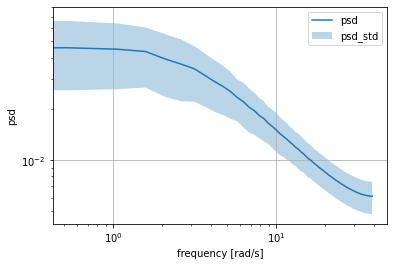

In [8]:
from yupi.stats import psd
from yupi.graphics import plot_psd

psd_mean, psd_std, frec = psd(trajs, lag=150)
plot_psd(psd_mean, frec, psd_std)